# Regresión Lineal

In [1]:
# graficos embebidos
%matplotlib inline

In [3]:
#importando pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importando los datasets de sklearn
from sklearn import datasets

boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head() # estructura de nuestro dataset.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

rl = LinearRegression() # Creando el modelo.
rl.fit(boston.data, boston.target) # ajustando el modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Lista de coeficientes B para cada X
list(zip(boston.feature_names, rl.coef_))

[('CRIM', -0.10717055656035455),
 ('ZN', 0.04639521952979589),
 ('INDUS', 0.020860239532169294),
 ('CHAS', 2.6885613993178867),
 ('NOX', -17.79575866030878),
 ('RM', 3.8047524602579625),
 ('AGE', 0.0007510617033184668),
 ('DIS', -1.4757587965198184),
 ('RAD', 0.30565503833909713),
 ('TAX', -0.012329346305270078),
 ('PTRATIO', -0.9534635546905579),
 ('B', 0.00939251272218855),
 ('LSTAT', -0.5254666329007923)]

In [7]:
# haciendo las predicciones
predicciones = rl.predict(boston.data)
predicciones_df = pd.DataFrame(predicciones, columns=['Pred'])
predicciones_df.head() # predicciones de las primeras 5 lineas

,Pred
0,30.008213
1,25.029861
2,30.570232
3,28.608141
4,27.942882


In [10]:
# Calculando el desvio -- mal falta matematica, coeficiente de determinacion
np.mean(boston.target - predicciones)

5.616938622609488e-16

# Regresión Logística

In [11]:
# Creando un dataset de ejemplo 
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4)

In [12]:
# Importando el modelo
from sklearn.linear_model import LogisticRegression

rlog = LogisticRegression() # Creando el modelo

# Dividiendo el dataset en entrenamiento y evaluacion
X_entrenamiento = X[:-200]
X_evaluacion = X[-200:]
y_entrenamiento = y[:-200]
y_evaluacion = y[-200:]

rlog.fit(X_entrenamiento, y_entrenamiento) #ajustando el modelo

# Realizando las predicciones
y_predic_entrenamiento = rlog.predict(X_entrenamiento) 
y_predic_evaluacion = rlog.predict(X_evaluacion)

In [13]:
# Verificando la exactitud del modelo
entrenamiento = (y_predic_entrenamiento == y_entrenamiento).sum().astype(float) / y_entrenamiento.shape[0]
print("sobre datos de entrenamiento: {0:.2f}".format(entrenamiento))
evaluacion = (y_predic_evaluacion == y_evaluacion).sum().astype(float) / y_evaluacion.shape[0]
print("sobre datos de evaluación: {0:.2f}".format(evaluacion))

sobre datos de entrenamiento: 0.89
sobre datos de evaluación: 0.89


# Arboles de decisión

In [15]:
# Creando un dataset de ejemplo
X, y = datasets.make_classification(1000, 20, n_informative=3)

# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

ad = DecisionTreeClassifier(criterion='entropy', max_depth=5) # Creando el modelo
ad.fit(X, y) # Ajustando el modelo

#generando archivo para graficar el arbol
with open("mi_arbol.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot)

# Random Forest

In [20]:
# Creando un dataset de ejemplo
X, y = datasets.make_classification(1000)

# Importando el random forest
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier() # Creando el modelo
rf.fit(X, y) # Ajustando el modelo

# verificando la precisión
print("precisión del modelo: {0: .2f}".format((y == rf.predict(X)).mean()))

precisión del modelo:  0.99


# k - nearest 

In [21]:
# Creando el dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
# importando KNN 
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(n_neighbors=10) # Creando el modelo con 10 vecinos
knnr.fit(X, y) # Ajustando el modelo

# Verificando el error medio del modelo
print("El error medio del modelo es: {:.2f}".format(np.power(y - knnr.predict(X),
2).mean()))

El error medio del modelo es: 0.02


# K-means

reducir al mínimo la suma de las distancias cuadradas desde la media dentro del agrupamiento

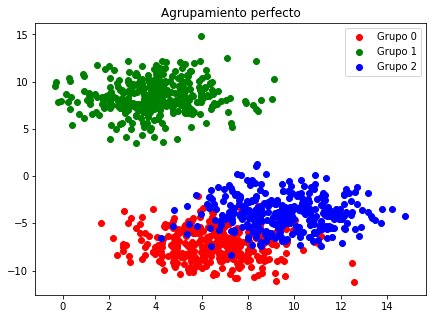

In [23]:
# Creando el dataset
grupos, pos_correcta = datasets.make_blobs(1000, centers=3,
cluster_std=1.75)

# Graficando los grupos de datos
f, ax = plt.subplots(figsize=(7, 5))
colores = ['r', 'g', 'b']

for i in range(3):
    p = grupos[pos_correcta == i]
    ax.scatter(p[:,0], p[:,1], c=colores[i],
               label="Grupo {}".format(i))

ax.set_title("Agrupamiento perfecto")
ax.legend()

plt.show()

In [24]:
# importando KMeans
from sklearn.cluster import KMeans

# Creando el modelo
kmeans = KMeans(n_clusters=3)
kmeans.fit(grupos) # Ajustando el modelo

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:

# verificando los centros de los grupos
kmeans.cluster_centers_

array([[ 9.55941434, -3.94308645],
       [ 3.98005704,  8.44638085],
       [ 6.25452072, -7.39626561]])

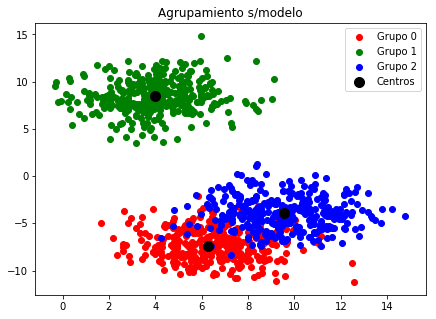

In [26]:
# Graficando segun modelo
f, ax = plt.subplots(figsize=(7, 5))
colores = ['r', 'g', 'b']

for i in range(3):
    p = grupos[pos_correcta == i]
    ax.scatter(p[:,0], p[:,1], c=colores[i],
               label="Grupo {}".format(i))

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           s=100, color='black', label='Centros')

ax.set_title("Agrupamiento s/modelo")
ax.legend()

plt.show()    